In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


In [2]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir)) # os.listdir() trả về danh sách các tệp trong thư mục

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train')) # os.listdir(f'{base_dir}/train') trả về danh sách các tệp trong thư mục train

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation')) # os.listdir(f'{base_dir}/validation') trả về danh sách các tệp trong thư mục validation

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs', 'panda']

Contents of validation directory:
['cats', 'dogs', 'panda']


In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Thư mục với hình ảnh huấn luyện mèo / chó
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_panda_dir = os.path.join(train_dir, 'panda')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_panda_dir = os.path.join(validation_dir, 'panda')

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['cats', 'dogs', 'panda']

Contents of validation directory:
['cats', 'dogs', 'panda']


In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
train_panda_fnames = os.listdir( train_panda_dir )


print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print(train_panda_fnames[:10])


print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total training panda images :', len(os.listdir( train_panda_dir ) ))


print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))
print('total validation panda images :', len(os.listdir( validation_panda_dir ) ))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['panda_00001.jpg', 'panda_00002.jpg', 'panda_00003.jpg', 'panda_00004.jpg', 'panda_00005.jpg', 'panda_00006.jpg', 'panda_00007.jpg', 'panda_00008.jpg', 'panda_00009.jpg', 'panda_00010.jpg']
total training cat images : 1000
total training dog images : 1000
total training panda images : 1000
total validation cat images : 500
total validation dog images : 500
total validation panda images : 500


In [6]:
import numpy as np
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the paths to the training and validation data
train_cats_dir = 'cats_and_dogs_filtered/train/cats'
train_dogs_dir = 'cats_and_dogs_filtered/train/dogs'
train_panda_dir = 'cats_and_dogs_filtered/train/panda'
validation_cats_dir = 'cats_and_dogs_filtered/validation/cats'
validation_dogs_dir = 'cats_and_dogs_filtered/validation/dogs'
validation_panda_dir = 'cats_and_dogs_filtered/validation/panda'


# Define the size of the images
img_width, img_height = 50, 50

# Define the number of samples to use for PCA
n_samples = 1000

# Load the images and convert them to arrays
def load_images(directory):
    images = []
    for filename in os.listdir(directory)[:n_samples]:
        img = load_img(os.path.join(directory, filename), target_size=(img_width, img_height))
        x = img_to_array(img)
        images.append(x.flatten())
    return np.array(images)

# Load the training and validation images
train_cats = load_images(train_cats_dir)
train_dogs = load_images(train_dogs_dir)
train_panda = load_images(train_panda_dir)
validation_cats = load_images(validation_cats_dir)
validation_dogs = load_images(validation_dogs_dir)
validation_panda = load_images(validation_panda_dir)

# Concatenate the training and validation images
X_train = np.concatenate((train_cats, train_dogs,train_panda)) # 
X_validation = np.concatenate((validation_cats, validation_dogs, validation_panda))  #

# Center the data by subtracting the mean
X_train_centered = X_train - np.mean(X_train, axis=0)
X_validation_centered = X_validation - np.mean(X_train, axis=0)

y_train = 1000*[0]+1000*[1]  +1000*[2]
y_validation = 500*[0]+500*[1]  +500*[2]

# Perform PCA to reduce the dimensionality of X_train to 3 dimensions
pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(X_train_centered)
X_validation_reduced = pca.transform(X_validation_centered)


print(X_train_reduced.shape)
print(X_validation_reduced.shape)


(3000, 3)
(1500, 3)


In [7]:
print(X_train_centered.shape)

y_train = np.array(y_train)
print(y_train.shape)

(3000, 7500)
(3000,)


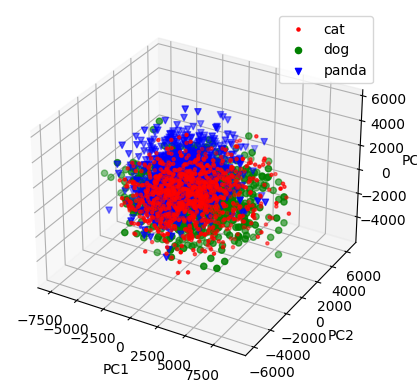

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the colors for each class
colors = {'cat': 'red', 'dog': 'green', 'panda': 'blue'}

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_train_reduced[:train_cats.shape[0], 0],
           X_train_reduced[:train_cats.shape[0], 1],
           X_train_reduced[:train_cats.shape[0], 2],
           color=colors['cat'], marker='.', label='cat')
ax.scatter(X_train_reduced[train_cats.shape[0]:train_cats.shape[0] + train_dogs.shape[0], 0],
           X_train_reduced[train_cats.shape[0]:train_cats.shape[0] + train_dogs.shape[0], 1],
           X_train_reduced[train_cats.shape[0]:train_cats.shape[0] + train_dogs.shape[0], 2],
           color=colors['dog'], marker='o', label='dog')
ax.scatter(X_train_reduced[train_cats.shape[0] + train_dogs.shape[0]:, 0],
           X_train_reduced[train_cats.shape[0] + train_dogs.shape[0]:, 1],
           X_train_reduced[train_cats.shape[0] + train_dogs.shape[0]:, 2],
           color=colors['panda'], marker='v', label='panda')

# Set the labels for the axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()

# Show the plot
plt.show()

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression

lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=100)
lorg.fit(X_train_centered,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [10]:
y_pred = lorg.predict(X_validation_centered)

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Calculate the accuracy of the model

accuracy = accuracy_score(y_validation, y_pred)
print("Test accuracy:", accuracy)

# Calculate the precision of each class
precision = precision_score(y_validation, y_pred, average=None)

# Print the precision of each class
print("Precision of each class:", precision)

# Calculate the recall of each class
recall = recall_score(y_validation, y_pred, average=None)

# Print the recall of each class
print("Recall of each class:", recall)

# Print confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_validation, y_pred))

Test accuracy: 0.45
Precision of each class: [0.42439024 0.4019802  0.55526316]
Recall of each class: [0.522 0.406 0.422]
Confusion matrix:
[[261 160  79]
 [207 203  90]
 [147 142 211]]


In [35]:

from sklearn.cluster import KMeans # Thư viện hỗ trợ phân cụm
from collections import Counter # Thư viện hỗ trợ đếm

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
# nếu clusters i có hệ số = 0 thì không tính
# nếu clusters i có hệ số > 0 thì tính tỷ lệ các mẫu không thuộc nhãn i nhưng được phân vào cùng một cụm với nhãn i

for i in range(3):
    if np.count_nonzero(labels == i) == 0:
        continue
    else:
        print('Cluster', i)
        print('Most frequent label:', Counter(y_train[labels == i]).most_common(1)[0][0])
        print('Other labels:')
        print(Counter(y_train[labels == i]).most_common()[:-1])
        print()

Cluster 0
Most frequent label: 2
Other labels:
[(2, 410), (0, 391)]

Cluster 1
Most frequent label: 1
Other labels:
[(1, 488), (0, 424)]

Cluster 2
Most frequent label: 2
Other labels:
[(2, 483), (0, 185)]



In [43]:
sum1 = 0
sum2 = 0
sum3 = 0
for i in range(2):
    if y_train[labels == 1]:
        sum1 += 1
    elif y_train[labels == 2]:
        sum2+= 1
    elif y_train[labels == 3]:
        sum3+= 1
print(sum1,sum2, sum3)
        

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()